In [1]:
%pip install tensorflow

Note: you may need to restart the kernel to use updated packages.


In [2]:
import warnings
warnings.filterwarnings('ignore')

from tensorflow.keras.preprocessing.image import ImageDataGenerator, load_img, img_to_array
from tensorflow.keras.layers import Input, Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.models import Model, Sequential
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping
import numpy as np
import matplotlib.pyplot as plt
import os


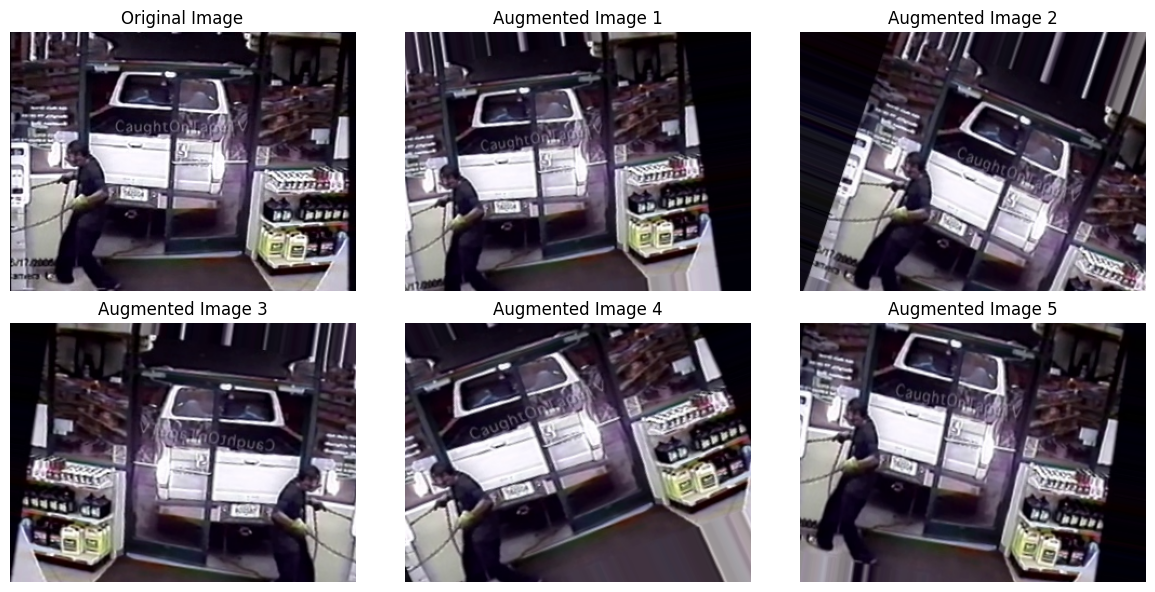

In [3]:
data_generator = ImageDataGenerator(
    rotation_range=30,
    width_shift_range=0.1,
    height_shift_range=0.1,
    zoom_range=0.1,
    shear_range=0.1,
    horizontal_flip=True,
    fill_mode='nearest'
)

# Load an example image
image_path = r'C:\Users\swadh\OneDrive\Desktop\crimedetection\Frames_for_Crime\Burglary\Burglary007_x264_fr0.jpg'
image = load_img(image_path, target_size=(240, 320))
image_array = img_to_array(image)
image_array = np.expand_dims(image_array, axis=0)

plt.figure(figsize=(12, 6))
plt.subplot(2, 3, 1)
plt.imshow(image_array[0].astype(np.uint8))
plt.title('Original Image')
plt.axis('off')

aug_iter = data_generator.flow(image_array, batch_size=1)

# Display augmented images
for i in range(5):
    augmented_images = next(aug_iter)
    plt.subplot(2, 3, i + 2)
    plt.imshow(augmented_images[0].astype(np.uint8))
    plt.title(f'Augmented Image {i+1}')
    plt.axis('off')

plt.tight_layout()
plt.show()


In [4]:
BATCH_SIZE_TRAINING = 32
IMAGE_RESIZE = (240, 320)

# Define the training data generator
train_data_generator = ImageDataGenerator(
    rotation_range=30,
    zoom_range=0.15,
    width_shift_range=0.1,
    height_shift_range=0.1,
    shear_range=0.1,
    horizontal_flip=True,
    fill_mode="nearest",
    rescale=1./255
)

# Create the training data generator
train_generator = train_data_generator.flow_from_directory(
    r'C:\Users\swadh\OneDrive\Desktop\crimedetection',
    target_size=IMAGE_RESIZE,
    batch_size=BATCH_SIZE_TRAINING,
    class_mode='binary',
    classes=['Frames_for_Crime', 'Frames_for_Normal']
)

print(f'Found {train_generator.samples} images belonging to {train_generator.num_classes} classes.')


Found 2230 images belonging to 2 classes.
Found 2230 images belonging to 2 classes.


In [5]:
print(f'train_gen.class_indices: {train_generator.class_indices}')


train_gen.class_indices: {'Frames_for_Crime': 0, 'Frames_for_Normal': 1}


In [6]:
# Define the AlexNet-like model
model = Sequential([
    Conv2D(96, (11, 11), strides=(4, 4), activation='relu', input_shape=(240, 320, 3)),
    MaxPooling2D(pool_size=(3, 3), strides=(2, 2)),
    Conv2D(256, (5, 5), padding='same', activation='relu'),
    MaxPooling2D(pool_size=(3, 3), strides=(2, 2)),
    Conv2D(384, (3, 3), padding='same', activation='relu'),
    Conv2D(384, (3, 3), padding='same', activation='relu'),
    Conv2D(256, (3, 3), padding='same', activation='relu'),
    MaxPooling2D(pool_size=(3, 3), strides=(2, 2)),
    Flatten(),
    Dense(4096, activation='relu'),
    Dropout(0.5),
    Dense(4096, activation='relu'),
    Dropout(0.5),
    Dense(1, activation='sigmoid')
])


In [7]:
adam = Adam(learning_rate=1e-4)
model.compile(optimizer=adam, loss='binary_crossentropy', metrics=['accuracy'])


In [10]:
# Early stopping callback
cb_early_stopper = EarlyStopping(monitor='loss', patience=4)

In [11]:
NUM_EPOCHS = 10
STEPS_PER_EPOCH_TRAINING = train_generator.samples // BATCH_SIZE_TRAINING

# Train the model
fit_history = model.fit(
    train_generator,
    steps_per_epoch=STEPS_PER_EPOCH_TRAINING,
    epochs=NUM_EPOCHS,
    callbacks=[cb_early_stopper]
)

Epoch 1/10
69/69 ━━━━━━━━━━━━━━━━━━━━ 130s 2s/step - accuracy: 0.5749 - loss: 0.6824
Epoch 2/10
69/69 ━━━━━━━━━━━━━━━━━━━━ 1s 236us/step - accuracy: 0.5000 - loss: 0.6933
Epoch 3/10
69/69 ━━━━━━━━━━━━━━━━━━━━ 105s 1s/step - accuracy: 0.6314 - loss: 0.6182
Epoch 4/10
69/69 ━━━━━━━━━━━━━━━━━━━━ 1s 162us/step - accuracy: 0.6875 - loss: 0.6113
Epoch 5/10
69/69 ━━━━━━━━━━━━━━━━━━━━ 102s 1s/step - accuracy: 0.7361 - loss: 0.5186
Epoch 6/10
69/69 ━━━━━━━━━━━━━━━━━━━━ 1s 0s/step - accuracy: 0.6875 - loss: 0.5106  
Epoch 7/10
69/69 ━━━━━━━━━━━━━━━━━━━━ 103s 1s/step - accuracy: 0.7926 - loss: 0.4548
Epoch 8/10
69/69 ━━━━━━━━━━━━━━━━━━━━ 1s 0s/step - accuracy: 0.7500 - loss: 0.5030  
Epoch 9/10
69/69 ━━━━━━━━━━━━━━━━━━━━ 101s 1s/step - accuracy: 0.8067 - loss: 0.4206
Epoch 10/10
69/69 ━━━━━━━━━━━━━━━━━━━━ 1s 0s/step - accuracy: 0.8438 - loss: 0.3656  


In [12]:
print(fit_history.history.keys())

dict_keys(['accuracy', 'loss'])


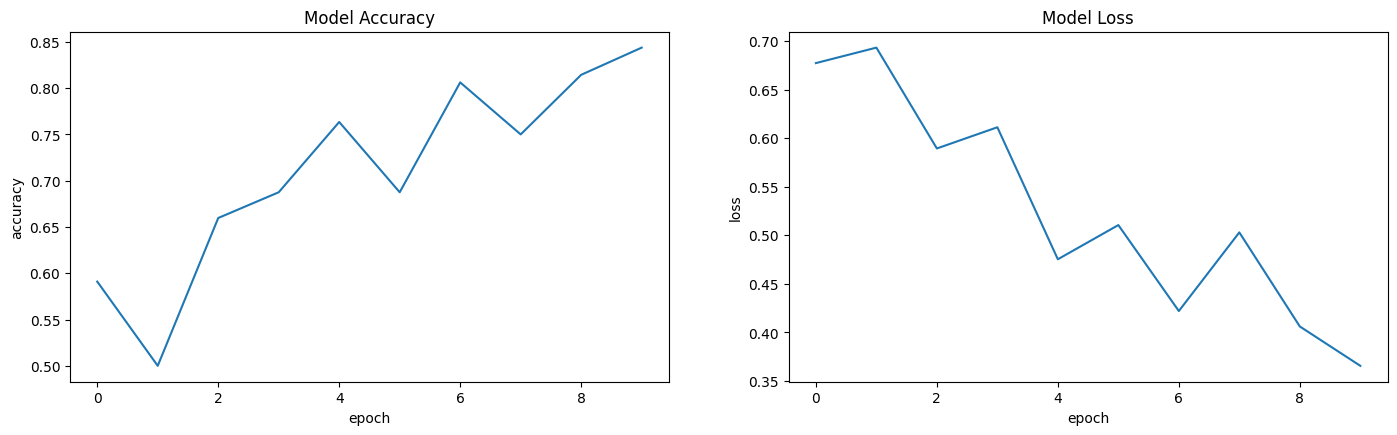

In [13]:
# Plot the training history
plt.figure(1, figsize=(17, 10))

plt.subplot(221)
plt.plot(fit_history.history['accuracy'])
plt.title('Model Accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')

plt.subplot(222)
plt.plot(fit_history.history['loss'])
plt.title('Model Loss')
plt.ylabel('loss')
plt.xlabel('epoch')

plt.show()

In [14]:
# Define the test data generator
test_data_generator = ImageDataGenerator(
    rescale=1./255
)

# Create a generator for the test data
test_generator = test_data_generator.flow_from_directory(
    r'C:\Users\swadh\OneDrive\Desktop\crimedetection',
    target_size=IMAGE_RESIZE,
    batch_size=BATCH_SIZE_TRAINING,
    class_mode='binary',
    classes=['test_crime', 'test_normal']
)

# Evaluate the model on the test data
evaluation = model.evaluate(test_generator)
print(f"Test Loss: {evaluation[0]}, Test Accuracy: {evaluation[1]}")

Found 556 images belonging to 2 classes.
18/18 ━━━━━━━━━━━━━━━━━━━━ 7s 366ms/step - accuracy: 0.8229 - loss: 0.3720
Test Loss: 0.3514705002307892, Test Accuracy: 0.8381295204162598


In [16]:
model.save('C:/Users/swadh/OneDrive/Desktop/crimedetection/alexnet.h5')